# STA 208: Homework 2 (Do not distribute)

**Lectures:** 1-5

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

__MY SOLUTION__

1. Assuming that log represents the natural logarithm, we can write $\ell_i(\beta) \propto - \log(\frac{e^{B^Tx}}{y!}e^{-e^{B^Tx}})$. We can take out the $y!$ term and drop it since it does not have any dependence on $\beta$. This leaves us with $\ell_i(\beta) = -B^Tx + e^{B^Tx}$. Finally, we apply the gradient to this function $\nabla \ell_i(\beta) = -X + Xe^{B^Tx}$

2. The empirical risk can be written as $R_n(\beta) = \frac{1}{n} \sum_{i=1}^n B^T_{i,i}x_i + e^{B^T_{i,i}x_i}$. To show that this function is convex we can use the 2nd order condition. As long as $\ell_i(\beta)$ satisfies the second order condition, we can say that the empirical risk will satisfy that condition as well since it is a linear combination of the loss function. $\nabla^2 \ell_i(\beta) = (X)^2e^{B^Tx}$. To satisfy the second order condition, 

$x^\top (\nabla^2 \ell_i(\beta)) x \ge 0, \forall x \tag{positive semi-definite}$

This gives $x^\top ((X)^2e^{B^\top x}) x$. We know that $(X)^2e^{B^\top x}$ is positive for any $B$ and any $x$ since the $X$ term is squared and the $x, B$ term is in the exp function which is always positive. We also know that $x^\top x$ is positive for all x, so we can say that our $R_n$ satisfies the second order convexity condition.


3. Since we know that $R_n$ is a convex function, we can say that for some x, $\nabla R_n(\beta) = 0$. Substituting this into our mapping equation, we find $F_\eta(\beta) = \beta - \eta \nabla (0)$   or   $F_\eta(\beta) = \beta$


4. Shown below in python block

In [1]:
import numpy as np

In [2]:
## Simulate from the Poisson regression model (use y,X)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

eta = 0.01

# Re initialize a separate random value for beta and run a while loop to see it converge to the optimal value
hat_beta = np.random.normal(0,.2,size = (p))
mse = ((hat_beta - beta)**2).mean()

# Set a threshold to determine convergence and a maximum number of iterations
threshold = 1e-5
max_iters = 20000
loop_count = 0

while mse > threshold and loop_count < max_iters:
    loop_count += 1
    
    # Calculate the new beta hat
    hat_beta = hat_beta - eta*(-X + X.T@lamb)
    
    # Calculate the mse between the beta hat and the original beta
    mse = ((hat_beta - beta)**2).mean()
    
print(loop_count)
print(mse)

20000
4490302247.438014


I can see now that the equation I found for the empirical risk is likely not right since my gradient descent algorithm is not reducing the square error between beta and beta hat. I believe that my process for finding beta hat is correct if I had the correct formula for the gradient of the empircal risk

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$. Notice that we can write this as 
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where 
1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.

__Answer 1__

$X_s \hat\beta = X_s (X_s^TX_s)^{-1} X_s^Ty = Hy$. From here we can rewrite the L2 norm, $||y - X_s\beta||_2^2$ as a funciton of $X_s$. $||y - X_s\beta||_2^2 = ||(I-H)y||_2^2 = [(I-H)y]^T (I-H)y$. Distributing the transpose, we have $||y - X_s\beta||_2^2 = y^T (I - H)^T (I - H)y$. Simplifying the central term we find, $||y - X_s\beta||_2^2 = y^T ||(I - H)||_2^2 y$. Given that $H = X_s (X_s^TX_s)^{-1} X_s^T$, we can see that this H is a projection matrix. The projection matrix H must be square, so I - H is square as well. This gives us a slightly different projection matrix, but I - H is still considered a projection matrix. One great property of projection matricies is that $P^2 = P$ for any projection matrix, so we can say that $||(I - H)||_2^2 = (I - H)$, and therefore our projection matrix $P_S = (I - H)$. The subspace in the range of this projection are the first k columns of $X$

2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?

__Answer 2__

$P_S$ is a projection matrix that projects the variable y onto the subspace of S. When we project y onto this subspace we find the portion of y that is "in the direction" of our subspace vector. As the dimension of S grows, we see that y is being projected into more dimensions and thus the amount of y that is exactly in that "direction" will likely diminish in size. This suggests that $y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$ will hold. 

3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).

I don't really understand the nature of this question

4. (Challenge) Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.

__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

In [3]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    plt.figure(figsize=(10,10))
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).

In [4]:
import pickle
from sklearn import preprocessing, linear_model
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

# Scaling training and test data
scaler = preprocessing.StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

# Computing OLS solution
ols = linear_model.LinearRegression()
ols.fit(X_tr, y_tr)

# Predicting and computing the test error
y_pred = ols.predict(X_te)
mse = ((y_pred - y_te)**2).mean()
print("Test error for OLS solution: {:.3f}".format(mse))

Test error for OLS solution: 1.039


2. Train and tune ridge regression using a validation set and compute the test error (square error loss).

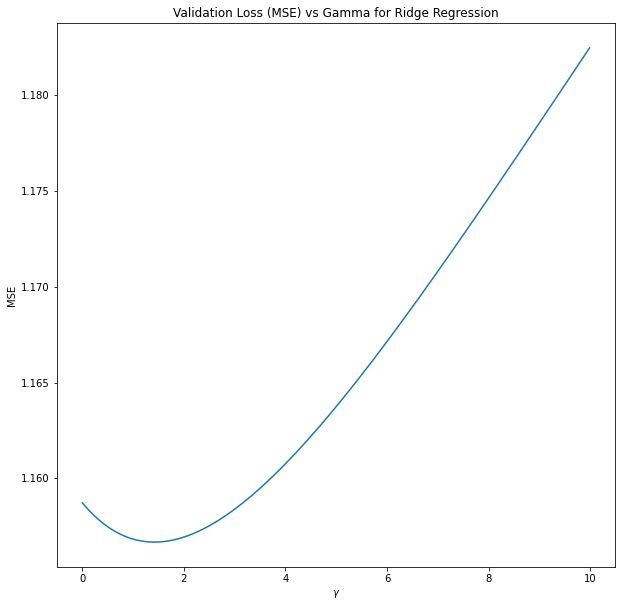

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting our training data into train and validation sets
# Setting the random state ensures that this split will be repeated the same every time
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.33, random_state=1)

# Training ridge regression and choosing the gamma with the smallest validation loss
gamma_array = np.arange(0, 10, 0.01)

# Initializing the validation loss array
val_loss = np.zeros_like(gamma_array)

for i, gamma in list(enumerate(gamma_array)):
    ridge = linear_model.Ridge(alpha=gamma)
    ridge.fit(X_tr, y_tr)
    
    # making prediction
    pred = ridge.predict(X_val)
    mse = ((pred - y_val)**2).mean()
    
    # append to val loss
    val_loss[i] = mse
    
plt.figure(figsize=(10,10))
plt.plot(gamma_array, val_loss)
plt.title("Validation Loss (MSE) vs Gamma for Ridge Regression")
plt.xlabel("$\gamma$")
plt.ylabel("MSE")
plt.show()

In [6]:
# Best Ridge regression according to the validation loss is actually the OLS solution (gamma = 0)
best_gamma = gamma_array[np.argwhere(val_loss == np.min(val_loss))][0,0]
print("Ideal gamma for ridge regression is {:.2f}".format(best_gamma))

# Find the test error for this gamma
ridge = linear_model.Ridge(alpha = best_gamma)
ridge.fit(X_tr, y_tr)
y_pred = ridge.predict(X_te)
test_error = ((y_pred - y_te)**2).mean()
print("Ridge regression test error is: {:.2f}".format(test_error))

Ideal gamma for ridge regression is 1.42
Ridge regression test error is: 1.11


3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.

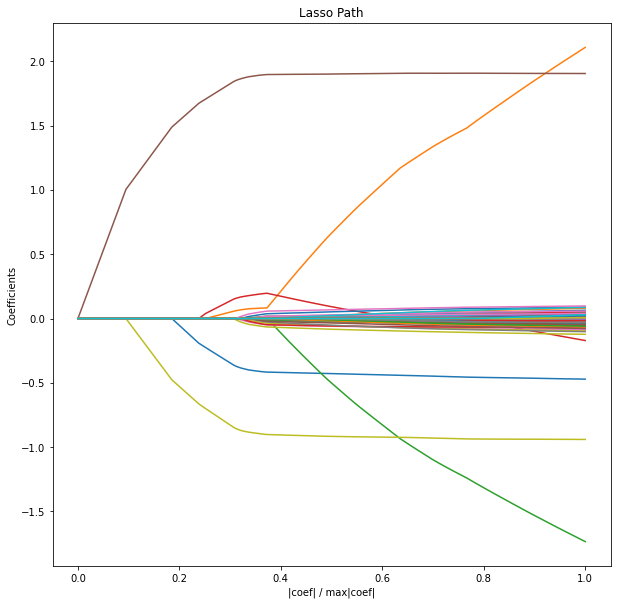

In [7]:
# Fit data using the lasso method
_, _, coeffs = linear_model.lars_path(X_tr, y_tr, method="lasso")
plot_lars(coeffs, title="Lasso Path")

4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.

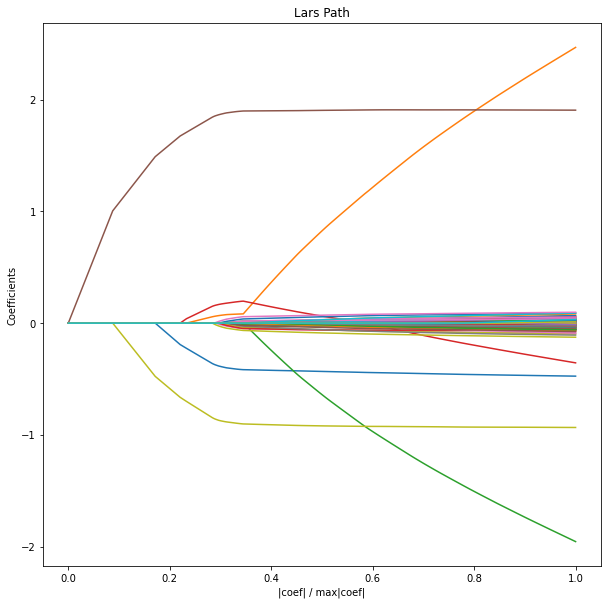

In [8]:
_, _, coeffs_lars = linear_model.lars_path(X_tr, y_tr, method="lar")
plot_lars(coeffs_lars, title="Lars Path")

One of the key differences between the lasso and the lars methods is that the lasso method allows for certain coefficients to remain zero if it deems other coefficients more important. This means that the active set of the lasso path might have fewer elements at certain positions along the x axis defined to be the normalized coefficient maximum. The line that best demonstrates this on both graphs is the red line. In the lasso method we see that the red line remains zero between the point 0.6 and 0.8 on the x axis. This does not happen with the lars path, the slope is constant for the red line, so it only remains zero for one point on the x axis. 

4. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.

In [18]:
# The active set is all the coefficients that are not zero in either model
active_lasso = coeffs[coeffs != 0]
active_lars = coeffs_lars[coeffs_lars != 0]

# Computing the OLS model for both lars and lasso
lasso_ols = linear_model.LinearRegression()
lasso_ols.fit(X_tr@coeffs, y_tr)
lasso_pred = lasso_ols.predict(X_te@coeffs)
lasso_mse = ((lasso_pred - y_te)**2).mean()
print("Lasso MSE: ", lasso_mse)

lars_ols = linear_model.LinearRegression()
lars_ols.fit(X_tr@coeffs_lars, y_tr)
lars_pred = lars_ols.predict(X_te@coeffs_lars)
lars_mse = ((lars_pred - y_te)**2).mean()
print("Lars MSE: ", lars_mse)

# The test error for both of these models is shockingly similar
# This is somewhat expected since the method for computing both lasso and lars coefficients is very similar

Lasso MSE:  1.1142289800109844
Lars MSE:  1.1142289800109537


5. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

In [20]:
print("Active set number Lasso: ", len(active_lasso))
print("Active set number Lars: ", len(active_lars))

Active set number Lasso:  5164
Active set number Lars:  5108


This tells me that the lars method has a smaller active set than the lasso method. The lasso method provides nearly identical mse to the lars method, so I would probably choose the lars method for computational simplicity. In the real world this would mean that we need to keep track of fewer variables to make the same prediction. 